In [1177]:
'''
Author: Aisha Kothare, Nivedita Vissamsetty
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter,filtfilt,welch
import math
import binascii
from unidecode import unidecode
from scipy.spatial import distance
import collections
'''
Common values for all modulation techniques
'''
samp_rate = 100 # 100 samples/s
bitrate =  2 # 2 bits/s

carr_freq = 4 # Hz/

<i><b>All codes included in this file for demodulation and decoding signals. To run the codes you need to just change the files under input wave file sections and execute the code</b></i>

# The input wave file - ASK 
<i>change to 1 or 2 depending on what input waveform you want, eg: for another file, enter that file name in fromfile parameter</i>

In [1206]:
ask_mod = np.fromfile('./ask_waveform_1.dat')

In [1207]:
df = pd.DataFrame(ask_mod,columns=['val'])
df['val'].round(decimals = 3)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9195   -0.0
9196   -0.0
9197   -0.0
9198   -0.0
9199   -0.0
Name: val, Length: 9200, dtype: float64

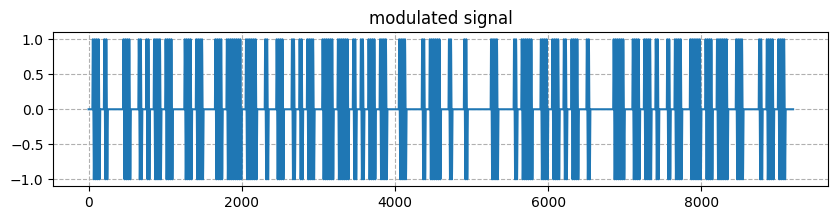

In [1208]:
fig = plt.figure(figsize=(10,2))
plt.plot(ask_mod)
plt.title("modulated signal")
plt.grid(True, linestyle='--')

### demodulation : we used 1,0 to demodulate the signal , 1 for any value > 0 or < 0  and 0 for values of form 0.0

In [1209]:
base = []
for i in df.val:
    if i > 0:
        base.append(1)
    if i < 0:
        base.append(1)
    if i == 0.0:
        base.append(0)

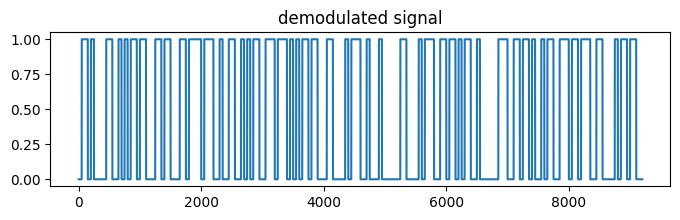

In [1210]:
fig = plt.figure(figsize=(8,2))
plt.plot(base, label='demodulated signal')
plt.title('demodulated signal')
plt.show()

## to find info bits on base signal: the time at which each bit comes will be sample rate/bit rate: every 50th place in our case

In [1211]:
info_bits= []
samp_by_bit = 100//2
sample =0
i = 0
while(sample<len(base)):
    info_bits.append(base[sample])
    sample += samp_by_bit
print(info_bits)

[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0]


## for decoding we convert the list to a stream (string of 0s and 1s) then check for the ascii value for each of the 8 bits

In [1212]:
message = ''.join(str(i) for i in info_bits)


In [1213]:
def toString(binaryString):
    return "".join([chr(int(binaryString[i:i+8],2)) for i in range(0,len(binaryString),8)])

## Original message

In [1214]:
toString(message)

'helloregular ask signal'

# The input wave file: FSK 
<i>change to 1 or 2 depending on what input waveform you want, eg: for another file, enter that file name in fromfile parameter</i>

In [1222]:
fsk_mod = np.fromfile('./fsk_waveform_2.dat')

In [1223]:
carr_freq2 = 2 
dfreq = 1
t = np.linspace(0, 1, 50)
#bit 1: 3 bit 0: 1

## the bit frequency map is used to store the frequencies used to represent both bits 0s and 1s. we get frequency of 0 by Fcarrier - Fdelta and frequency of 1 by Fcarrier + Fdelta

In [1224]:
bit_freq_map = {"0":1,"1":3}

## we then map all the corresponding waves to the symbols in our modulated wave. i.e to 0 and 1

In [1225]:
wave_to_sym = collections.defaultdict(list)
    
for bit , freq in bit_freq_map.items():
    wave_to_sym[bit].append(np.sin(freq*2*np.pi*t))

## Once we have a mapping of all instantaneous values for corrresponding bits, we know that sampling rate is 50, so at each 50th interval window we take product to get rid of the carrier.

In [1226]:
bit_str = ""
    
for index in range(0, len(fsk_mod), 50):
    best_symbol = ""
    high_val = 0
    for sym, sym_wave in wave_to_sym.items():
        window = fsk_mod[index:index+50]
        val = abs(np.dot(sym_wave[0:len(window)], window))
        if val > high_val:
            best_symbol = sym
            high_val = val
    bit_str += best_symbol


In [1227]:
bit_str

'011110010110111101110101001000000110011001101111011101010110111001100100001000000111010001101000011001010010000001100110011100100110010101110001011101010110010101101110011000110111100100100000011011110110011001100110011100110110010101110100011110010110111101110101001000000110011001101111011101010110111001100100001000000111010001101000011001010010000001100110011100100110010101110001011101010110010101101110011000110111100100100000011011110110011001100110011100110110010101110100011110010110111101110101001000000110011001101111011101010110111001100100001000000111010001101000011001010010000001100110011100100110010101110001011101010110010101101110011000110111100100100000011011110110011001100110011100110110010101110100011110010110111101110101001000000110011001101111011101010110111001100100001000000111010001101000011001010010000001100110011100100110010101110001011101010110010101101110011000110111100100100000011011110110011001100110011100110110010101110100'

## Original string: since the baseband encoding is same for all our waveforms we use the previous decoding function toString for getting our final original string.

In [1228]:
toString(bit_str)

'you found the frequency offsetyou found the frequency offsetyou found the frequency offsetyou found the frequency offset'

# The input wave file: PSK 1

In [1194]:
t = np.linspace(0, 1, 50)
psk_mod = np.fromfile('./bpsk_waveform_1.dat')
flip = False
samp_rate = 50
carr_freq=2

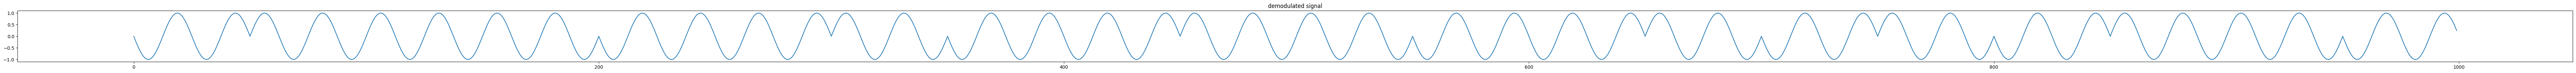

In [1195]:
fig = plt.figure(figsize=(100,2))
plt.plot(psk_mod[:1000], label='demodulated signal')
plt.title('demodulated signal')
plt.show()

In [1196]:
c_samples = np.arange(len(psk_mod))
carrier = np.sin(2*np.pi*carr_freq*c_samples/samp_rate)

## plotting the phase wave for representing 0 and 1

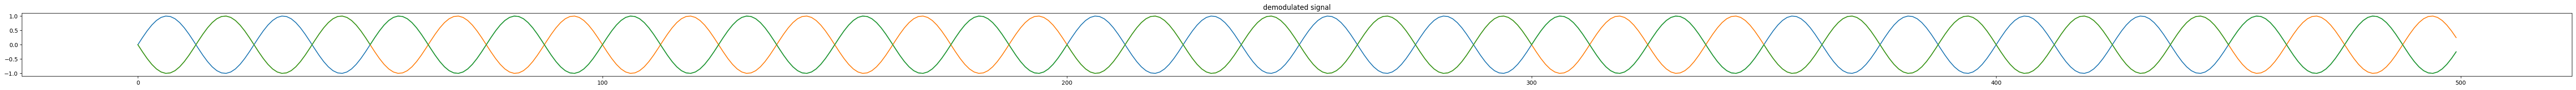

In [1197]:
fig = plt.figure(figsize=(80,2))
plt.plot(carrier[:500], label='demodulated signal')
plt.plot(-carrier[:500])
plt.plot(psk_mod[:500])
plt.title('demodulated signal')
plt.show()

In [1198]:
bit1 = carrier
bit0 = -carrier 

## the bit phase map is used to store the phase used to represent both bits 0s and 1s. we get  0 by carrier*-1 and  1 by carrier

In [1199]:
bit_phase = {"0":bit0,"1":bit1}

## we then compare values of modulated signal in every sub-window of size 50 which is stored in bit phase maps, if the signal values match that of bit 1 we append message bit as 1 else 0.

In [1200]:
bit_str2 = ""
for index in range(0, len(psk_mod), 50): 
    bit_val = ""
    window = np.round(psk_mod[index:index+50], 2) 
    for bit,phase in bit_phase.items():
        curr_bit = bit
        sym_phase1 = np.round(phase[index:index+len(window)], 2)
        if (sym_phase1==window).all():
            bit_val = curr_bit
        else:
            bit_val = "0"
    bit_str2 += bit_val


print(bit_str2)

011100100110010101100111011101010110110001100001011100100010000001100010011100000111001101101011001000000111001101101001011001110110111001100001011011000111001001100101011001110111010101101100011000010111001000100000011000100111000001110011011010110010000001110011011010010110011101101110011000010110110001110010011001010110011101110101011011000110000101110010001000000110001001110000011100110110101100100000011100110110100101100111011011100110000101101100


## Original signal: we use the same decoding function as mentioned for ask to convert 1 byte to its ascii value to get original message

In [1201]:
toString(bit_str2)

'regular bpsk signalregular bpsk signalregular bpsk signal'

# input wave file psk 2

In [1202]:
psk_mod2 = np.fromfile('./bpsk_waveform_2.dat')
samp_rate = 50
carr_freq=2

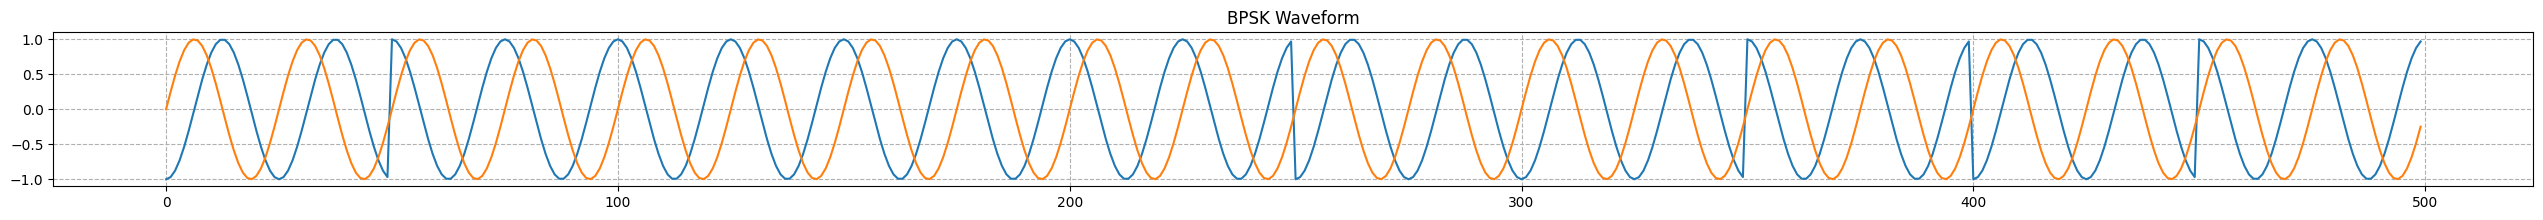

In [1203]:
ax, fig = plt.subplots(figsize=(32, 2))
plt.plot(psk_mod2[:500])
plt.plot(carrier[:500])
plt.title("BPSK Waveform")
plt.grid(True, linestyle='--')

## it can be seen from the waveform that just one bit prior to the change in waveform we see an inverse hence logically all it would take to get original wave

In [1204]:
bit_str3 = ""
for index in range(0, len(psk_mod2), 50):
    target = np.around(psk_mod2[index+49],2)
    bit_val=""
    max_num = max(-target,0)
    if max_num > 0:
        bit_val="0"
    else:
        bit_val="1"
    bit_str3+=bit_val
print(bit_str3)

01111001011011110111010100100000011001100110111101110101011011100110010000100000011101000110100001100101001000000111000001101000011000010111001101100101001000000111001101101000011010010110011001110100


## we use the same decoding function as mentioned for ask to convert 1 byte to its ascii value to get original message

In [1205]:
toString(bit_str3)

'you found the phase shift'

### final outputs for all waveforms
<ol>
    <li>ASK 1: 'helloregular ask signal'</li>
    <li>ASK 2: 'you found the temporal offset'</li>
    <li>FSK 1: 'you found the frequency offsetregular fsk signal' </li>
    <li>FSK 2: 'you found the frequency offsetyou found the frequency offsetyou found the frequency offsetyou found the frequency offset'</li>
    <li>PSK 1: 'regular bpsk signalregular bpsk signalregular bpsk signal'</li>
    <li>PSK 2: 'you found the phase shift'</li>
</ol>

# Theory Questions

### What happens if bitrate > carrier frequency?

If bitrate > carrier frequency, there would be distorted or corrupted signal generation which is difficult to decode. This also causes “aliasing” i.e., the waveforms shown on an oscilloscope are no longer identifiable since the signal frequency was incorrectly detected. If bitrate/data rate is higher, higher carrier frequency is required for truer measurement of communication.

### What are the drawbacks and the limitations of these modulation techniques?

<ol>
    <li> <b>ASK</b>
        <ol>
            <li> Drawbacks:
                <ul>
                    <li>Sensitivity to noise: ASK is not resistant to noise. Noise can easily impact in the change of amplitude. Data transmission mistakes may result from noise.</li>
                    <li>Power efficiency: ASK has low power efficiency. Because amplitude changes require a wider range of signal levels, thus it requires more power to transmit the same amount of data.</li>
                 </ul>
            </li>
            <li> Limitations:
                <ul>
                    <li>Complexity of detection: Because ASK involves the detection of amplitude variations, a more sophisticated receiver circuit is needed.</li>
                    <li>Limited dynamic range: ASK can only broadcast a certain range of signal amplitudes because to its limited dynamic range.</li>
                </ul>
            </li>
        </ol>
   </li>
    
<li> <b>FSK</b>
    <ol>
        <li> Drawbacks:
            <ul>
                <li>Complexity: Compared to other modulation techniques, FSK needs more sophisticated hardware and signal processing, which can raise costs and reduce dependability.</li>
                <li>Interference: FSK can be affected by interference from other signals with frequencies close to the carrier wave.</li>
                <li>It is less resistant to noise compared to PSK.</li>
             </ul>
        </li>
        <li> Limitations:
            <ul>
                <li>It requires more bandwidth and hence can only be limited to be used in low speed. </li>
            </ul>
        </li>
    </ol>
</li>
<li> <b>PSK</b>
    <ol>
        <li> Drawbacks:
            <ul>
                <li>They have poor bandwidth efficiency.</li>
                <li>Decoding of the binary data involves estimating the signal's phase states. These algorithms for detection and recovery are quite intricate.</li>
             </ul>
        </li>
        <li> Limitations:
            <ul>
                <li>Sensitivity to frequency offset: PSK is susceptible to frequency offset, which is the discrepancy between the signal's real frequency and its planned frequency. This sensitivity may result in data transmission problems, which would lower the system's overall performance. </li>
                <li>It requires complex receiver circuit to receive phase changes.</li>
            </ul>
        </li>
    </ol>
</li>
    
</ol>

### Which of these modulation techniques is the most resistant to noise and why?

The modulation technique which is most resistant to noise is PSK (Phase Shift Keying).

It uses changes in the phase of the carrier signal to transmit data. In PSK, the phase of the carrier signal is shifted to represent different digital symbols, such as 0s and 1s. Unlike the amplitude or frequency of the signal, the phase shift is a discrete value and is therefore less impacted by noise. PSK also uses error-correction codes to detect and correct errors that may occur due to noise. This also increases the overall reliability and quality of transmission